In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import tree

In [39]:
df = pd.read_csv('dog_horse.csv')
df.head()

,Unnamed: 0,height,weight,target,type
0,0,27.0,71.0,0.0,dog
1,1,27.0,92.0,0.0,dog
2,2,32.0,47.0,0.0,dog
3,3,30.0,90.0,0.0,dog
4,4,28.0,91.0,0.0,dog


In [40]:
df.shape


(200, 5)

In [41]:
df.describe()

,Unnamed: 0,height,weight,target
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,47.480000,106.830000,0.500000
std,57.879185,18.415353,38.636836,0.501255
min,0.000000,25.000000,40.000000,0.000000
25%,49.750000,32.000000,80.000000,0.000000
50%,99.500000,43.000000,99.000000,0.500000
75%,149.250000,62.250000,141.000000,1.000000
max,199.000000,84.000000,179.000000,1.000000


In [42]:
df.keys()

Index(['Unnamed: 0', 'height', 'weight', 'target', 'type'], dtype='object')

In [43]:
df.isnull().sum()

Unnamed: 0    0
height        0
weight        0
target        0
type          0
dtype: int64

In [44]:
#dropping unnessory colums Unnamed and type
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('type', inplace=True, axis=1)

In [45]:
df.head()

,height,weight,target
0,27.0,71.0,0.0
1,27.0,92.0,0.0
2,32.0,47.0,0.0
3,30.0,90.0,0.0
4,28.0,91.0,0.0


In [46]:
# Sort columns for convenience 
seq = ['height','weight','target']
df = df.reindex(columns=seq)

In [47]:
# Baseline 
df["target"].value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: target, dtype: float64

In [48]:
#specify the target and features
vars = ['height','weight']

x = df[vars]
y = df.target

In [49]:
#split the data 

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=2)

Create a Decision Tree Classifier model on your training data.

In [50]:
#Set max depth to 3 to make plotting the tree more visible

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

Report the precision, recall, and accuracy of your training and test sets.

In [51]:
#we can calculate the accuarcy using score
score = clf.score(X_train, y_train)
print(score)

0.975


In [52]:
 y_pred = clf.predict(X_test)
y_pred

array([1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0.])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Plot your Decision Tree at the end of your notebook showing the tree you created.

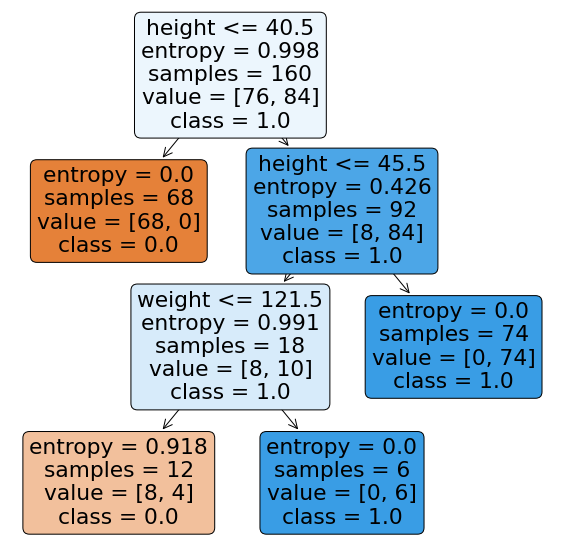

In [34]:
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf, 
    filled=True,#without color
    rounded=True,
    feature_names=['height','weight'], # columns in same order as was trained on
    class_names=[str(x) for x in clf.classes_]
);

Model Using Gini

In [36]:
# Set max depth to 3 to make plotting the tree more visible
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(X_train, y_train)

In [37]:
#we got the same score using entropy 
score = clf2.score(X_train, y_train)
print(score)

0.975
